<a href="https://colab.research.google.com/github/ArtfulMonster/Machine-Learning/blob/main/HW2_Q2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import data

data = pd.read_csv("Housing.csv")
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [78]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [79]:
# Step 2: Converting strings to float

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


In [80]:
# Step 3: Split data between training and validation

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [81]:
y_train = data_train.pop('price')
X_train = data_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [82]:
# Step 4: Preprocess the data input

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking',]

data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
data_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [83]:
# Step 5: Seperate Columns

y = data.values[:, 0]  # output column(price)
x1 = data.values[:, 1]  # area
x2 = data.values[:, 2]  # bedrooms
x3 = data.values[:, 3]   #bathrooms
x4 = data.values[:, 10]  #parking

m = len(x1)  # Number of training examples
n = len(y)  # Number of training examples

print('x1 = ', x1[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

x1 =  [7420 8960 9960 7500 7420]
y =  [13300000 12250000 12250000 12215000 11410000]
m =  545
n =  545


In [84]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [85]:
#reshape x1
X_1 = x1.reshape(m, 1)

#reshape x2
X_2 = x2.reshape(m, 1)

#reshape x3
X_3 = x3.reshape(m, 1)

#reshape x4
X_4 = x4.reshape(m, 1)

#Stacking
X_s = np.hstack((X_0, X_1, X_2, X_3, X_4))

# seperating training and validation
train_size = int(0.8 * len(X_s))
X_train = X_s[:train_size]
y_train = y[:train_size]

X_val = X_s[train_size:]
y_val = y[train_size:]

#initialize theta values to zero
theta = np.zeros(5)
theta

array([0., 0., 0., 0., 0.])

In [86]:
#create cost computing function

def compute_cost(X_s, y, theta):

  predictions = X_s.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  C = 1 / (2 * m) * np.sum(sqrErrors)
  return C

# compute cost for training set
cost_train = compute_cost(X_train, y_train, theta)
print('The cost for given values of theta_0 and theta_1 =', cost_train)

# compute cost for validation set
cost_val = compute_cost(X_val, y_val, theta)
print('The cost for given values of theta_0 and theta_1 =', cost_val)

The cost for given values of theta_0 and theta_1 = 12348659568608.809
The cost for given values of theta_0 and theta_1 = 758256796050.4587


In [87]:
#creating gradient descent parameters

def gradient_descent(X_s, y, theta, alpha, iterations):

  m = len(y)      # Number of training examples
  cost_history = np.zeros(iterations)

  for i in range(iterations):
        predictions = X_s.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X_s.transpose().dot(errors)
        theta = sum_delta - theta
        cost_history[i] = compute_cost(X_s, y, theta)

  return theta, cost_history

In [88]:
theta = [0., 0., 0., 0., 0.]
iterations = 10
alpha = 0.1

# GD for training
theta, cost_history_train = gradient_descent(X_train, y_train, theta, alpha, iterations)
print('Final value of theta1 =', theta)

# GD for validation
theta, cost_history_val = gradient_descent(X_val, y_val, theta, alpha, iterations)
print('Final value of theta1 =', theta)

Final value of theta1 = [-3.776242408965886e+64 -2.4066653536120027e+68 -1.1661899896438456e+65
 -5.198180075759591e+64 -3.4252313783487204e+64]
Final value of theta1 = [-7.303177932452413e+126 -3.122375583674448e+130 -1.8799434552236192e+127
 -7.61368961855499e+126 -2.394759075295893e+126]


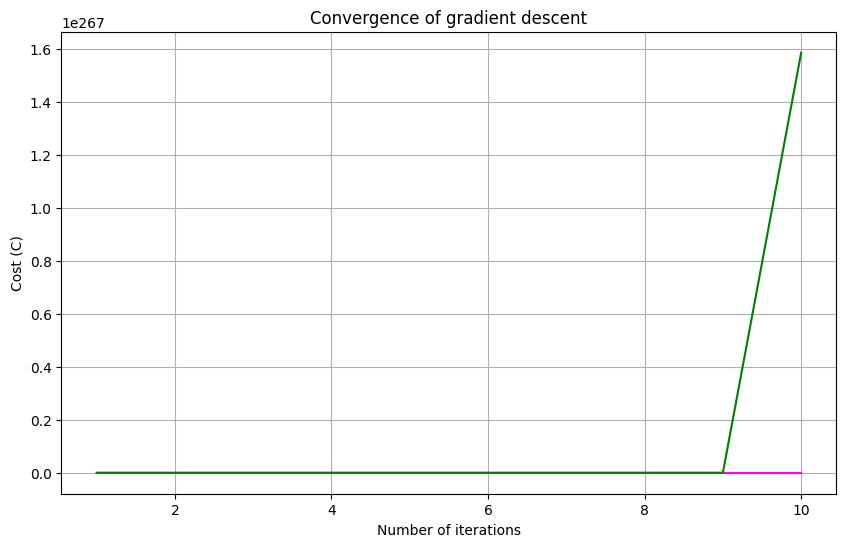

In [89]:
plt.plot(range(1, iterations + 1), cost_history_train, color='magenta')
plt.plot(range(1, iterations + 1), cost_history_val, color='green')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (C)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()